In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

In [2]:
bike_df = pd.read_csv("day.csv")
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Encode the Categorical values


In [3]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
bike_df['season'] = bike_df['season'].astype('category')
bike_df['yr'] = bike_df['yr'].astype('category')
bike_df['mnth'] = bike_df['mnth'].astype('category')
bike_df['holiday'] = bike_df['holiday'].astype('category')
bike_df['weekday'] = bike_df['weekday'].astype('category')
bike_df['workingday'] = bike_df['workingday'].astype('category')
bike_df['weathersit'] = bike_df['weathersit'].astype('category')
bike_df['season'] = bike_df['season'].astype('category')
bike_df['season'] = bike_df['season'].astype('category')
# bike_df['dteday'] = bike_df['dteday'].astype('datetime')
bike_df['dteday'] = pd.to_datetime(bike_df.dteday)

In [5]:
bike_df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Checking for Nan Values

In [6]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# removing useless feature
bike_df = bike_df.drop(['casual' , 'registered'], axis=1)

### Statistical Description of Data

In [8]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_df[numeric_features + ['cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


From this, we can see that the mean number of daily rentals is around 4504; but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day.

We might get a clearer idea of the distribution of rentals values by visualizing the data. Common plot types for visualizing numeric data distributions are :-
### Histogram and Box Plot

<ipython-input-9-1e92f6373b5d>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


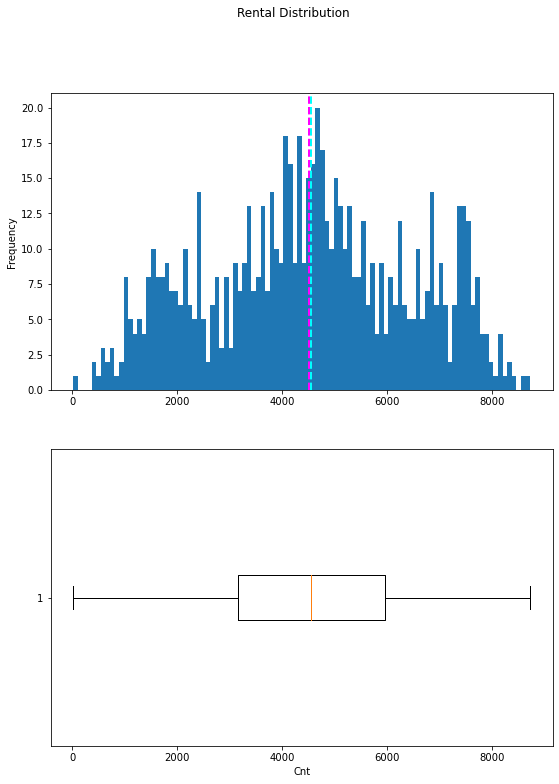

In [9]:
label = bike_df['cnt']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Cnt')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

From the above distribution we can conclude that the data is normally distributed as mean and median nearer the middle of the range of values. 

Also, as there are no circular dots seen on box plot we can conclude that there no outliers in the data.

### Plotting Histogram for each Numerical Values

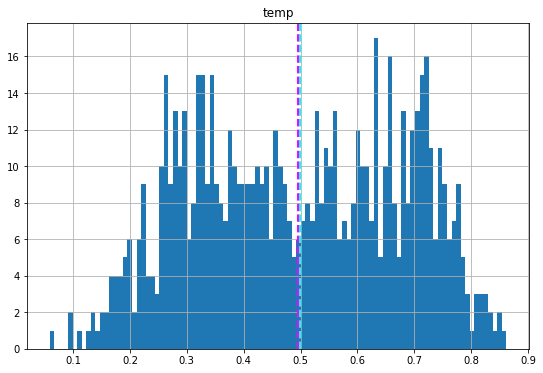

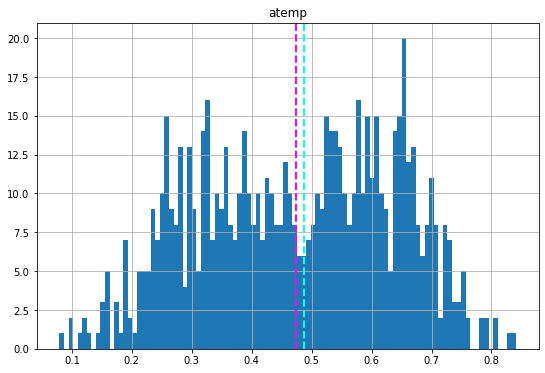

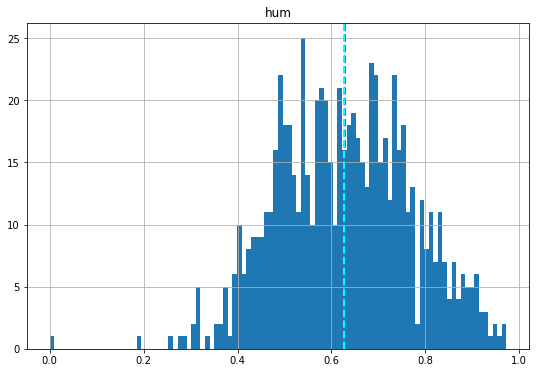

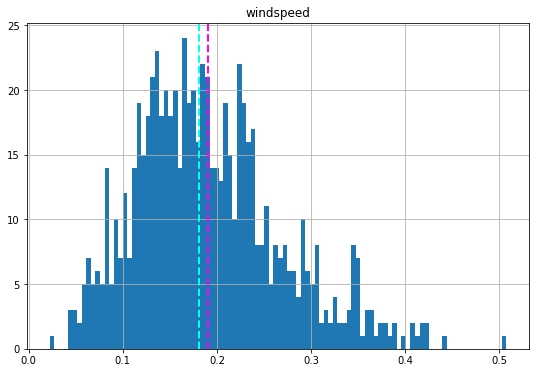

In [10]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

### Outlier Analysis

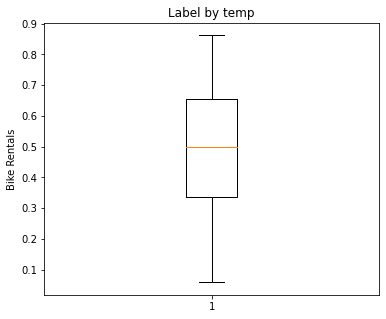

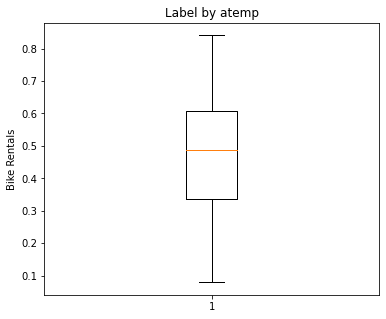

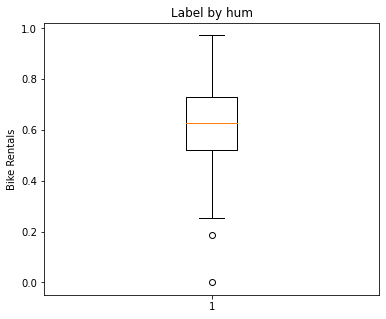

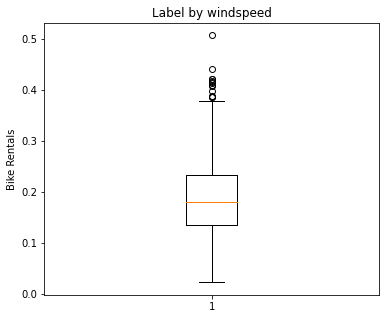

In [11]:

for col in numeric_features:
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    plt.boxplot(bike_df[col])
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

### Categorical features

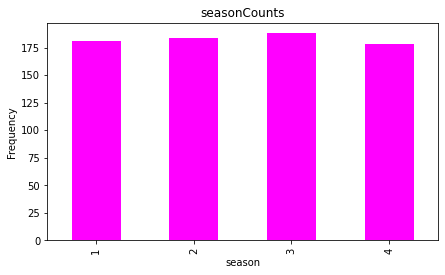

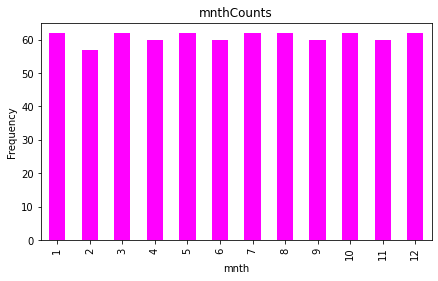

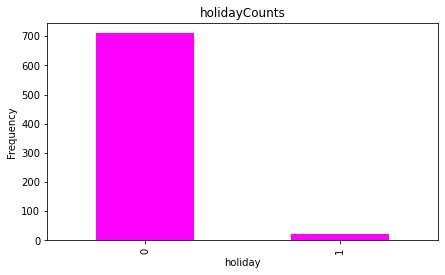

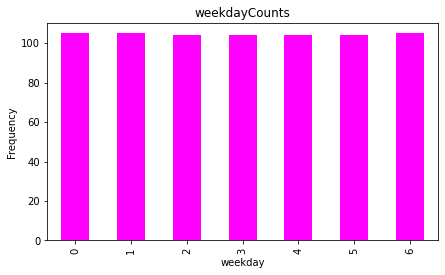

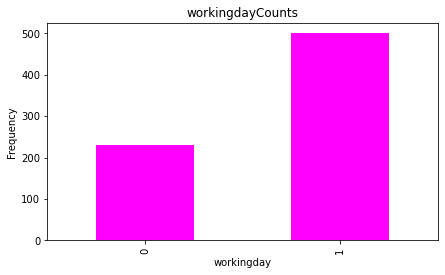

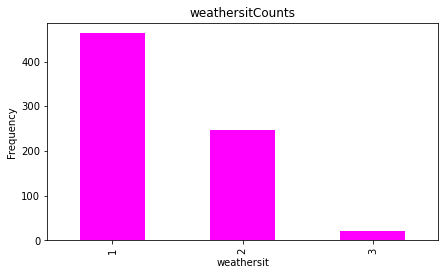

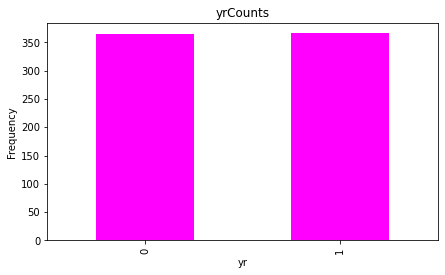

In [12]:
# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','yr']

for col in categorical_features:
    counts = bike_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='magenta')
    ax.set_title(col + 'Counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features show a more or less *uniform* distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

- **holiday**: There are many fewer days that are holidays than days that aren't.
- **workingday**: There are more working days than non-working days.
- **weathersit**: Most days are category *1* (clear), with category *2* (mist and cloud) the next most common. There are comparatively few category *3* (light rain or snow) days, and no category *4* (heavy rain, hail, or fog) days at all.

### Findng Correlation between numerical variables

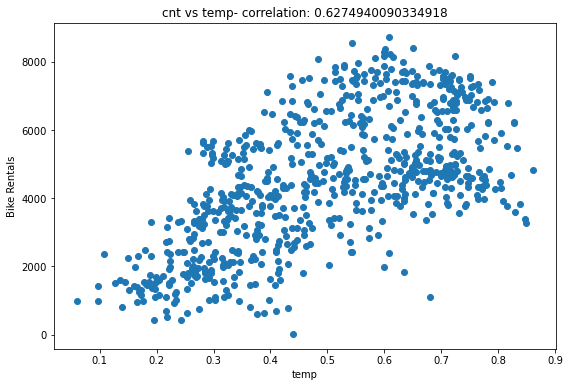

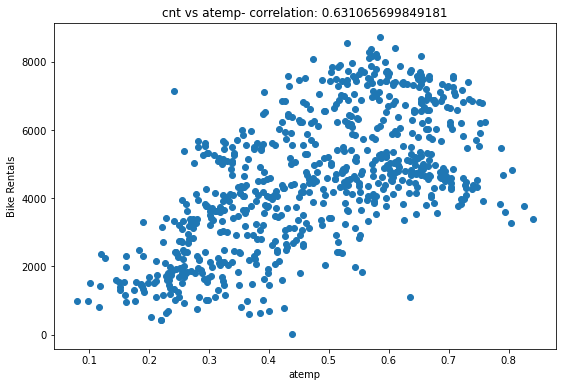

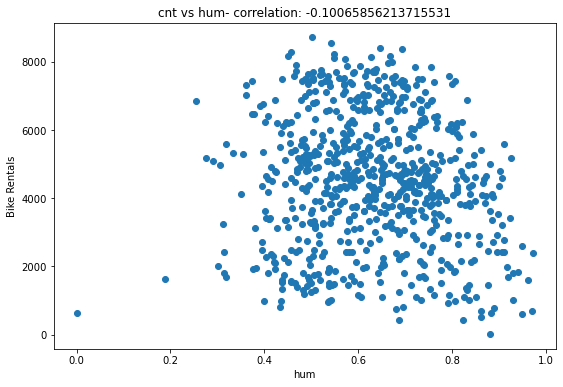

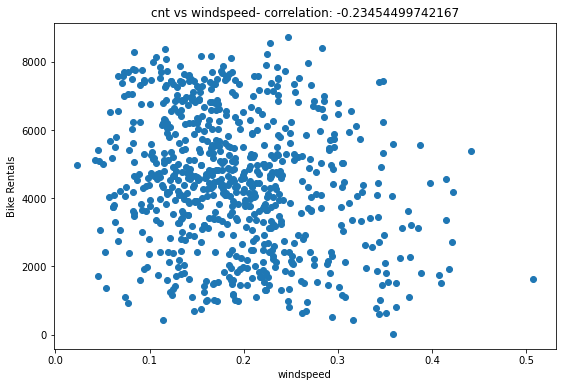

In [13]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('cnt vs ' + col + '- correlation: ' + str(correlation))
plt.show()

<AxesSubplot:>

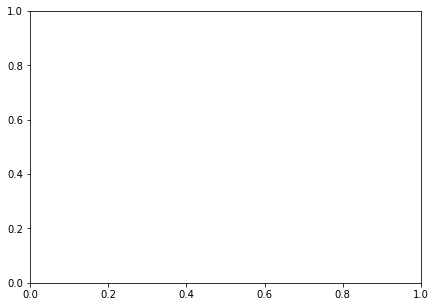

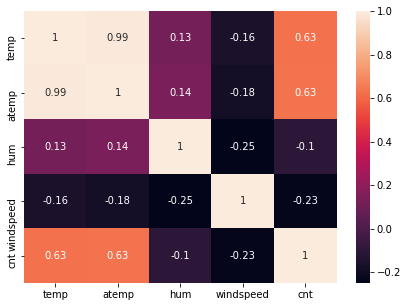

In [14]:
df_corr = bike_df.iloc[:,7:]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr,annot = True)

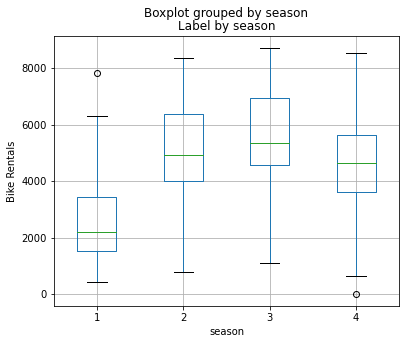

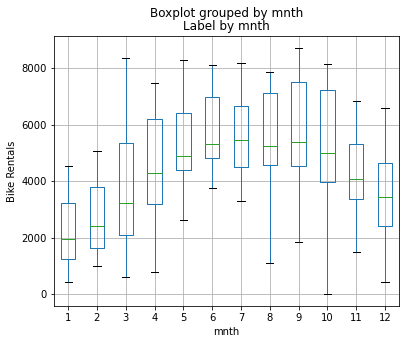

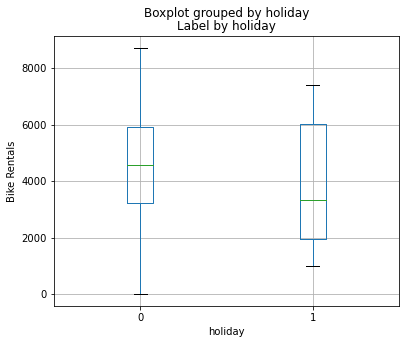

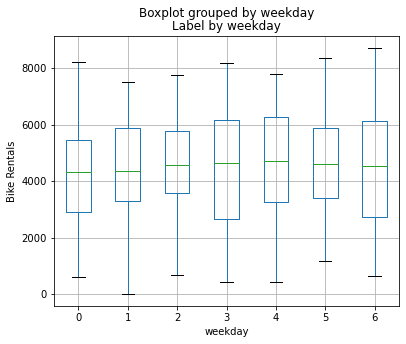

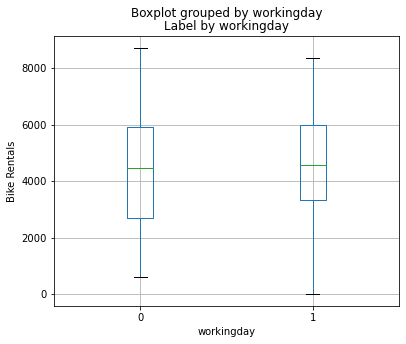

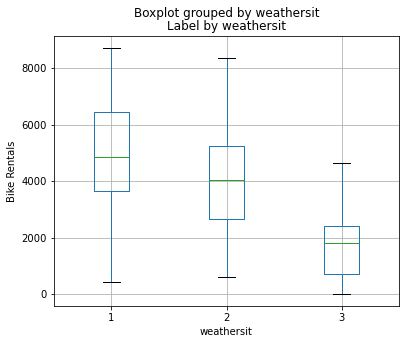

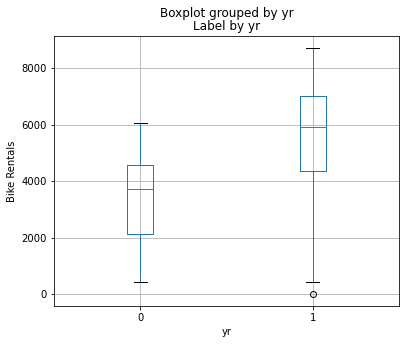

In [15]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    bike_df.boxplot(column = 'cnt', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

In [16]:
X, y = bike_df.iloc[:, 2:13], bike_df.iloc[:, -1:]
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# print(categorical_features)
# # label encode the column
# for col in categorical_features:
#     ohe = preprocessing.OneHotEncoder()
#     feature_arr = ohe.fit_transform(bike_df[[col]]).toarray()
#     temp_df = pd.DataFrame(feature_arr)
#     features_df = pd.DataFrame()
#     temp_df.columns = ohe.get_feature_names()
#     features_df = features_df.append(temp_df)
    
# temp_df
#     # one hot encoding
#     ohe = preprocessing.OneHotEncoder()
#     feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
#     feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
#     features_df = pd.DataFrame(feature_arr, columns=feature_labels)

### Randomly Splitting the Data

In [18]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

### Simple Linear Regression Model

In [19]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)
print(y_test.shape)

LinearRegression()
(220, 1)


### Evaluating the Trained Model

In [20]:
predictions = model.predict(X_test)
print('Predicted labels: ', np.round(predictions)[:10] , '\n')
print('Actual labels   : ' ,y_test[:10], '\n')
# predictions = str(predictions).replace("]\n [",",").replace('[','').replace(']','')
# pred = predictions.split(',')


Predicted labels:  [[6195.]
 [1456.]
 [2989.]
 [4328.]
 [6844.]
 [7093.]
 [ 742.]
 [2122.]
 [7030.]
 [6437.]] 

Actual labels   :        cnt
703  6606
33   1550
300  3747
456  6041
633  7538
557  7264
39   1605
356  2209
559  7499
514  5743 



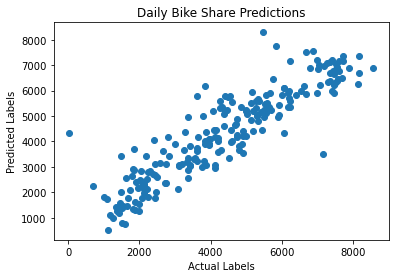

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 751126.2310636697
RMSE: 866.6753896723211
R2: 0.8112257766076472


## Experimenting with Different Algorithms

The linear regression algorithm we used to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:

- **Linear algorithms**: Not just the Linear Regression algorithm we used above (which is technically an *Ordinary Least Squares* algorithm), but other variants such as *Lasso* and *Ridge*.
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction.
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.


### Lasso Linear regression

Lasso() 

MSE: 723250.308179146
RMSE: 850.4412432256246
R2: 0.8182315973022849


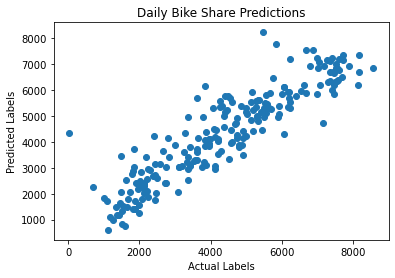

In [23]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
plt.show()

### Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor(max_depth=12, min_samples_leaf=3).fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=3) 

|--- feature_7 <= 0.43
|   |--- feature_7 <= 0.28
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_2 <= 10.50
|   |   |   |   |--- feature_8 <= 0.24
|   |   |   |   |   |--- feature_9 <= 0.67
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |--- feature_7 <= 0.19
|   |   |   |   |   |   |   |   |--- value: [949.60]
|   |   |   |   |   |   |   |--- feature_7 >  0.19
|   |   |   |   |   |   |   |   |--- value: [1258.00]
|   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |--- feature_7 <= 0.18
|   |   |   |   |   |   |   |   |--- value: [1369.60]
|   |   |   |   |   |   |   |--- feature_7 >  0.18
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.22
|   |   |   |   |   |   |   |   |   |--- value: [1521.25]
|   |   |   |   |   |   |   |   |--- feature_8 >  0.22
|   |   |   |   |   |   |   |   |   |--- value: [1638.00]
|   |   |   |   |   |--- feature_9 >  0.67
|   |   |   |  

### Evaluating Decision tree Model

DecisionTreeRegressor(max_depth=12, min_samples_leaf=3) 

MSE: 584860.8441396471
RMSE: 764.7619525967849
R2: 0.8530118546270034


Text(0.5, 1.0, 'Daily Bike Share Predictions')

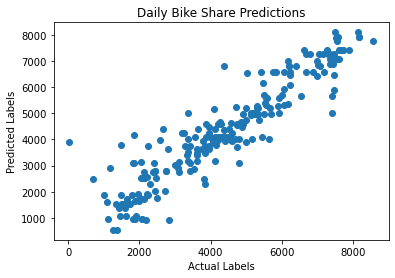

In [25]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
print (model, "\n")
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

The tree based approach doesn't imrove the linear model 


## Ensemble Model
Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a *bagging*) or by building a sequence of models that build on one another to improve predictive performance (referred to as *boosting*).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

### Random Forest Regressor

<ipython-input-26-5c48bc27a5f4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFmodel = RandomForestRegressor(random_state=2).fit(X_train, y_train)


RandomForestRegressor(random_state=2) 

MSE: 409017.11940590903
RMSE: 639.5444624151702
R2: 0.8972051755392859


Text(0.5, 1.0, 'Daily Bike Share Predictions')

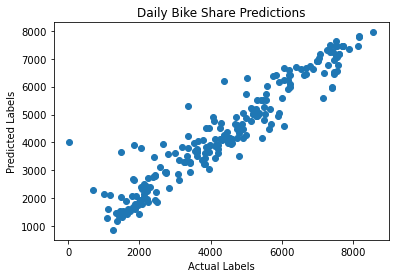

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
RFmodel = RandomForestRegressor(random_state=2).fit(X_train, y_train)
print (RFmodel, "\n")

# Evaluate the model using the test data
RFPredictions = RFmodel.predict(X_test)
mse = mean_squared_error(y_test, RFPredictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, RFPredictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, RFPredictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

For good measure, let's also try a *boosting* ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the *loss* (error) in the model.

### Gradient Boosting Regressor

GradientBoostingRegressor(learning_rate=0.3, random_state=1) 

MSE: 390761.79254748765
RMSE: 625.1094244590204
R2: 0.9017931329397244


C:\Users\Pacifier\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, 'Daily Bike Share Predictions')

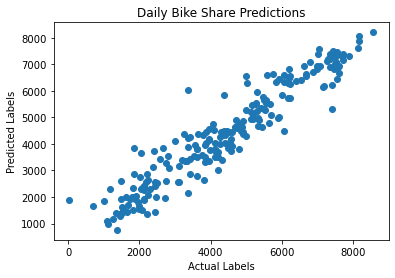

In [27]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
GBRmodel = GradientBoostingRegressor(learning_rate=0.3, random_state=1).fit(X_train, y_train)
print (GBRmodel, "\n")

# Evaluate the model using the test data
GBRpredictions = GBRmodel.predict(X_test)
mse = mean_squared_error(y_test, GBRpredictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, GBRpredictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, GBRpredictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### Dist-Plotting the Predicted values

C:\Users\Pacifier\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

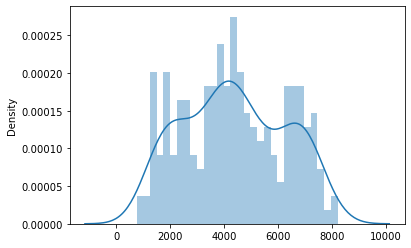

In [28]:
sns.distplot(GBRpredictions,bins=30)


### Summarized code for Evaluation of Multiple models

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(random_state=2), AdaBoostRegressor(), GradientBoostingRegressor(learning_rate=0.3, n_estimators=100, random_state=1), KNeighborsRegressor(), SVR()]
model_names = ['LinearRegression', 'Lasso', 'Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'SVR']
r2_train = []
r2_val = []
mse = []
for model in models:
    print(model)
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_train = y_pred_train.clip(0)
    y_pred_val = mod.predict(X_test)
    y_pred_val = y_pred_val.clip(0)
    mse.append(mean_squared_error(y_test, y_pred_val))
    rmse_val = (np.sqrt(mse))
    r2_train.append(r2_score(y_train, y_pred_train))
    r2_val.append(r2_score(y_test, y_pred_val))
print(rmse_val)
data = {'Modelling Algorithm' : model_names, 'Test MSE' : mse, 'Test RMSE': rmse_val, 'Train R2' : r2_train, 'Test R2' : r2_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train R2'] - data['Test R2'])) * 100)/(data['Train R2'])
data.sort_values(by = 'Test R2', ascending = False)

LinearRegression()
Lasso()
Ridge()
DecisionTreeRegressor()
RandomForestRegressor(random_state=2)


<ipython-input-29-7eb884ea431f>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(X_train, y_train)


AdaBoostRegressor()
GradientBoostingRegressor(learning_rate=0.3, random_state=1)
KNeighborsRegressor()
SVR()

C:\Users\Pacifier\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Pacifier\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[ 866.67538967  850.44124323  845.25055849  842.51255453  639.54446242
  881.18459689  625.10942446  996.96106188 1989.41102871]


C:\Users\Pacifier\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Modelling Algorithm,Test MSE,Test RMSE,Train R2,Test R2,Difference
6,GradientBoostingRegressor,3.907618e+05,625.109424,0.989564,0.901793,8.869623
4,RandomForestRegressor,4.090171e+05,639.544462,0.981228,0.897205,8.563026
3,DecisionTreeRegressor,7.098274e+05,842.512555,1.000000,0.821605,17.839494
2,Ridge,7.144485e+05,845.250558,0.786701,0.820444,4.289191
1,Lasso,7.232503e+05,850.441243,0.788657,0.818232,3.749961
0,LinearRegression,7.511262e+05,866.675390,0.789142,0.811226,2.798481
5,AdaBoostRegressor,7.764863e+05,881.184597,0.848402,0.804852,5.133108
7,KNeighborsRegressor,9.939314e+05,996.961062,0.829597,0.750204,9.570111
8,SVR,3.957756e+06,1989.411029,0.015389,0.005330,65.362420


### Conclusion
As we can Gradient Boosting Regressor is giving is the best R2 score as well as the lowest RMSE value we will be using Random Forest Predictions 


In [30]:
result = pd.DataFrame(X_test)
result['prediction_cnt'] = GBRpredictions
result

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,prediction_cnt
703,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,6952.673529
33,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,1482.714009
300,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,3588.037091
456,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,4499.934145
633,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,7476.284672
...,...,...,...,...,...,...,...,...,...,...,...,...
299,4,0,10,0,4,1,2,0.470000,0.457046,0.812917,0.197763,3838.929735
516,2,1,5,0,4,1,1,0.680000,0.631329,0.492917,0.195279,7396.808966
533,2,1,6,0,0,0,1,0.592500,0.571975,0.598750,0.144904,6835.219858
264,3,0,9,0,4,1,2,0.628333,0.554963,0.902083,0.128125,3790.523370


### Saving GBR predictions to a csv

In [31]:
result.to_csv("GradientBoostingPrediction.csv",index=False)